<a href="https://colab.research.google.com/github/Rachel1809/predict_sales_based_on_marketing_campaign/blob/main/Predict_sales_based_on_marketing_campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict sales based on marketing campaign

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Datasets

The dataset is getting from the Kaggle, which is [`Dummy Data HSS.csv`](https://www.kaggle.com/harrimansaragih/dummy-advertising-and-sales-data). This dataset has four marketing channel that have the strong impact on the `Sales` recently that are `TV`, `Radio`, `Social Media` and `Influencer`.

### Data manipulation and analysis

First, we will read the data and view its structure in general ưith the first ten rows.

In [ ]:
data = pd.read_csv ("Dummy Data HSS.csv")
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)
data.isnull().any()
df = pd.DataFrame(data)
df.head(10)

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181
5,29.0,9.614382,1.027163,Mega,105.889148
6,55.0,24.893811,4.273602,Micro,198.679825
7,31.0,17.355042,2.289855,Nano,108.733932
8,76.0,24.648898,7.130116,Macro,270.189400
9,13.0,0.431128,2.229423,Mega,48.280582


We can easily recognize that the `Influencer` data is in text, which is not the number as other parameters. Therefore, we will categorize this column into indicator variables.

In [ ]:
cdf = pd.get_dummies(df)
cdf = cdf[['TV', 'Radio', 'Social Media', 'Influencer_Mega', 'Influencer_Micro','Influencer_Macro', 'Influencer_Nano', 'Sales']]
cdf.head(10)

,TV,Radio,Social Media,Influencer_Mega,Influencer_Micro,Influencer_Macro,Influencer_Nano,Sales
0,16.0,6.566231,2.907983,1,0,0,0,54.732757
1,13.0,9.237765,2.409567,1,0,0,0,46.677897
2,41.0,15.886446,2.913410,1,0,0,0,150.177829
3,83.0,30.020028,6.922304,1,0,0,0,298.246340
4,15.0,8.437408,1.405998,0,1,0,0,56.594181
5,29.0,9.614382,1.027163,1,0,0,0,105.889148
6,55.0,24.893811,4.273602,0,1,0,0,198.679825
7,31.0,17.355042,2.289855,0,0,0,1,108.733932
8,76.0,24.648898,7.130116,0,0,1,0,270.189400
9,13.0,0.431128,2.229423,1,0,0,0,48.280582


We then explore data with the view of statistics.**bold text**

In [ ]:
cdf.describe()

,TV,Radio,Social Media,Influencer_Mega,Influencer_Micro,Influencer_Macro,Influencer_Nano,Sales
count,4546.000000,4546.000000,4546.000000,4546.000000,4546.000000,4546.000000,4546.000000,4546.000000
mean,54.062912,18.157533,3.323473,0.253410,0.252530,0.244611,0.249450,192.413332
std,26.104942,9.663260,2.211254,0.435011,0.434511,0.429903,0.432742,93.019873
min,10.000000,0.000684,0.000031,0.000000,0.000000,0.000000,0.000000,31.199409
25%,32.000000,10.555355,1.530822,0.000000,0.000000,0.000000,0.000000,112.434612
50%,53.000000,17.859513,3.055565,0.000000,0.000000,0.000000,0.000000,188.963678
75%,77.000000,25.640603,4.804919,1.000000,1.000000,0.000000,0.000000,272.324236
max,100.000000,48.871161,13.981662,1.000000,1.000000,1.000000,1.000000,364.079751


Now, we will analyze the impact of each marketing channels on the `Sales`

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 41.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 41.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 41.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 39.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


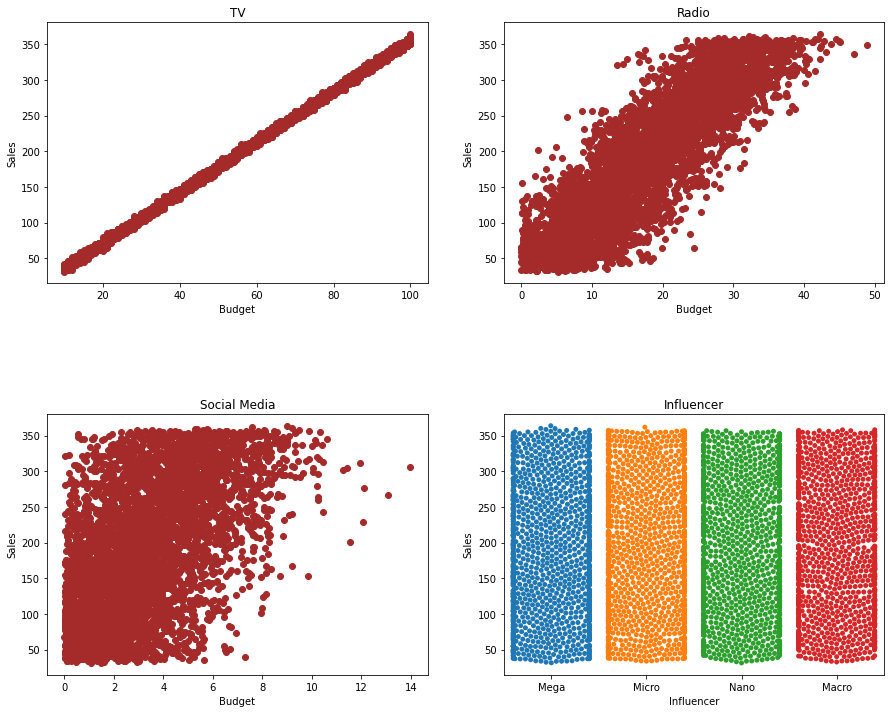

In [ ]:
import seaborn as sns

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)

name = ["TV", "Radio", "Social Media"]
i = 0
for i in range(len(name)):
  var = name[i]
  plt.subplot(2, 2, i+1)
  x_final = np.asarray(df[var])
  y_final = np.asarray(df["Sales"])
  plt.scatter(x_final, y_final, color = "brown")
  plt.xlabel("Budget")
  plt.ylabel("Sales")
  plt.title(var)

plt.subplot(2, 2, 4)
sns.swarmplot(x='Influencer', y='Sales', data = df)
plt.xlabel("Influencer")
plt.ylabel("Sales")
plt.title("Influencer")
plt.show()

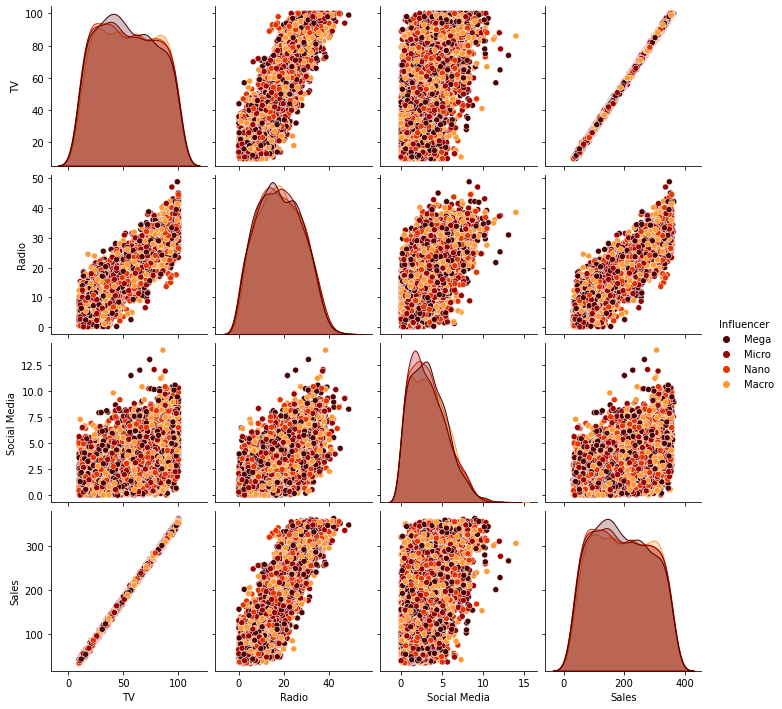

In [ ]:
sns.pairplot(df, hue='Influencer', palette='gist_heat', dropna=True)

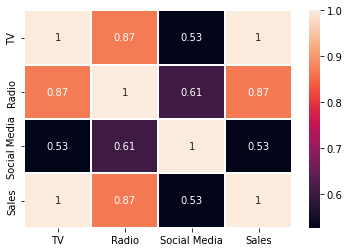

In [ ]:
sns.heatmap(df.corr(), annot=True, lw=1)

### Train test slit

We need to split our dataset into training and testing sets, `train_test_split` from `sklearn.model_selection` library can help us. We keep 70% of the data for training and the rest, 30%, is used for testing.

In [ ]:
from sklearn.model_selection import train_test_split
x = cdf[['TV', 'Radio', 'Social Media', 'Influencer_Mega', 'Influencer_Micro', 'Influencer_Macro', 'Influencer_Nano']]
y = cdf['Sales']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 101)

## Multiple linear regression model

### Building linear regression model

Python has provided the library `sklearn.linear_model` to support Linear Regression, `LinearRegression()`. First, we create an instance of `LinearRegression` class and use `x_train`, `y_train`, which are features and labels respectively, to train the model using the `fit()` method of that class. From now on, our model named as `model`

In [ ]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit (x_train, y_train)

LinearRegression()

### Model Equation

In [ ]:
print("Intercept: ", model.intercept_)
coeff_parameter = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
coeff_parameter

Intercept:  -0.1782040902442361


,Coefficient
TV,3.563667
Radio,-0.002509
Social Media,-0.006277
Influencer_Mega,-0.008376
Influencer_Micro,-0.003238
Influencer_Macro,0.086660
Influencer_Nano,-0.075045


### Prediction

In [ ]:
y_pred = model.predict(x_test)
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [295.5892338  320.46259468 181.51513893 ...  85.32321192 238.62199885
 266.90752186]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


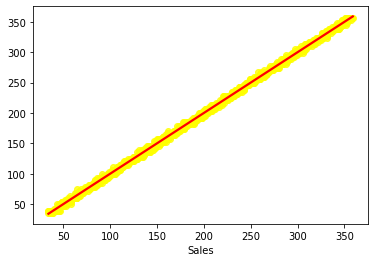

In [ ]:
sns.regplot(y_test, y_pred, scatter_kws={"color": "yellow"}, line_kws={"color": "red"})

### Comparing prediction and actual data

In [ ]:
from google.colab import data_table
from vega_datasets import data

model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})

data_table.enable_dataframe_formatter()
model_diff

,Actual value,Predicted value
4070,296.326787,295.589234
2374,320.883144,320.462595
2421,182.641149,181.515139
364,161.182955,163.640731
4055,290.458708,291.943794
...,...,...
1752,352.031653,355.995861
3963,295.053625,295.435502
870,86.583221,85.323212
2869,240.107728,238.621999


### Model evaluation

In [ ]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('R squared: {:.2f}'.format(model.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 99.90
Mean Absolute Error: 2.3446477605060436
Mean Square Error: 8.426457713486725
Root Mean Square Error: 2.9028361499551996


In [ ]:
import statsmodels.api as sm
x_train_sm = sm.add_constant(x_train)
ls = sm.OLS(y_train, x_train_sm).fit()
print(ls.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 5.212e+05
Date:                Fri, 18 Mar 2022   Prob (F-statistic):               0.00
Time:                        07:54:18   Log-Likelihood:                -7977.1
No. Observations:                3182   AIC:                         1.597e+04
Df Residuals:                    3175   BIC:                         1.601e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1426      0.099  

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
"""
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)

name = ["TV", "Radio", "Social Media"]
i = 0
for i in range(len(name)):
  var = name[i]
  x_final = np.asarray(x_test[var])
  y_final = np.asarray(y_test)
  m, b = np.polyfit(x_final, y_final, 1)
  plt.subplot(3, 3, i+1)
  plt.scatter(x_final, y_final, color = "blue")
  plt.plot(x_final, x_final * m + b, color = "red")
  plt.title(var)
"""

'\nplt.figure(figsize=(15, 12))\nplt.subplots_adjust(hspace=0.5)\n\nname = ["TV", "Radio", "Social Media"]\ni = 0\nfor i in range(len(name)):\n  var = name[i]\n  x_final = np.asarray(x_test[var])\n  y_final = np.asarray(y_test)\n  m, b = np.polyfit(x_final, y_final, 1)\n  plt.subplot(3, 3, i+1)\n  plt.scatter(x_final, y_final, color = "blue")\n  plt.plot(x_final, x_final * m + b, color = "red")\n  plt.title(var)\n'

In [ ]:
"""
infl = df[["Influencer", "Sales"]]

infl_mega = infl[infl["Influencer"] == "Mega"]

infl_micro = infl[infl["Influencer"] == "Micro"]

infl_macro = infl[infl["Influencer"] == "Macro"]

infl_nano = infl[infl["Influencer"] == "Nano"]

y_mega = np.asanyarray(infl_mega["Sales"])
y_micro = np.asanyarray(infl_micro["Sales"])
y_macro = np.asanyarray(infl_macro["Sales"])
y_nano = np.asanyarray(infl_nano["Sales"])
"""

'\ninfl = df[["Influencer", "Sales"]]\n\ninfl_mega = infl[infl["Influencer"] == "Mega"]\n\ninfl_micro = infl[infl["Influencer"] == "Micro"]\n\ninfl_macro = infl[infl["Influencer"] == "Macro"]\n\ninfl_nano = infl[infl["Influencer"] == "Nano"]\n\ny_mega = np.asanyarray(infl_mega["Sales"])\ny_micro = np.asanyarray(infl_micro["Sales"])\ny_macro = np.asanyarray(infl_macro["Sales"])\ny_nano = np.asanyarray(infl_nano["Sales"])\n'